<a href="https://colab.research.google.com/github/SIRIGIREDDYDHANALAXMI/ML-project-1/blob/master/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#LETS IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns


In [0]:
#READING DATA
country_code = pd.read_csv("//content//drive//My Drive//zomato-restaurants-data//Country-Code.csv")
Data= pd.read_csv("//content//drive//My Drive//zomato-restaurants-data//zomato.csv",
                  encoding='ISO-8859-1')


In [0]:
print(Data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [0]:
#MERGING CSV FILES on column = "Country Code"
data= Data.merge(country_code, on="Country Code")
print(data["Country Code"])

0       162
1       162
2       162
3       162
4       162
       ... 
9546    208
9547    208
9548    208
9549    208
9550    208
Name: Country Code, Length: 9551, dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


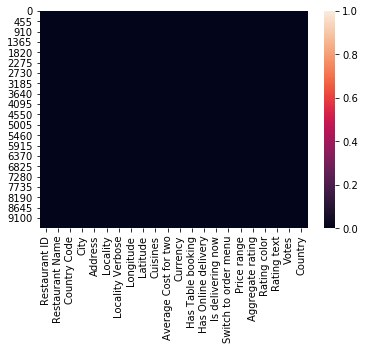

In [0]:
#lets now check for null values
print(sns.heatmap(data.isnull()))

In [0]:
#black background indicates that there are null values and whites dots (which may not be visible for small null values). Lets see the null values
print(data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [0]:
#only Cuisines have null values and its datatype is "object", so lets use mode to fill null values
data["Cuisines"] = data["Cuisines"].fillna(data["Cuisines"]).mode()[0]

AxesSubplot(0.125,0.125;0.62x0.755)


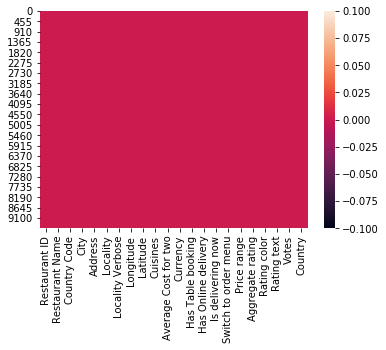

In [0]:
#lets now check for null values again. pink background indicates that there are no null values.Data Cleaning is done !!
print(sns.heatmap(data.isnull()))

lets first segregrate based on country --> city 




In [0]:
#lets firstly check the data type of Country Code and City
print(data["Country Code"].dtype)
print(data["City"].dtype)


int64
object


In [0]:
#change the data type from object to string
data["City"] = data["City"].astype(str)

In [0]:
#basic recommendation based on country , city ,Cuisines,  table booking or online booking
#WE need to apply NLP for Cuisines as it's data type is multpile strings

import nltk
nltk.download("punkt")
data["Cuisines"] = data["Cuisines"].astype(str)

#lets tokenize the strings in the Cuisine column
words=data.apply(lambda data: nltk.word_tokenize(data["Cuisines"]) , axis=1)

def recommend1(cc , city , cuisine):
  x= data
  x= x[x["Country Code"] == cc ]   #country segregation
  x= x[x["City"]== city]           #city segregation
  
  #table booking or online booking segregation
  k=int(input("zero for table booking and one for online booking"))
  if(k==0):
    x=x[x["Has Table booking"] == "Yes"]
    if(x.size>=1):
      print("Have a nice day")
    else:
      print("There are no restaurants with Table Booking in your region") #this is just to indicate whether the resatuarants of such kind are available or not
  else:
    x=x[x["Has Online delivery"]== "Yes"]
    if(x.size>=1):
      print("Have a nice day")
    else:
      print("There are no restaurants with Online delivery in your region")
  
  #Cuisine based segregation. After tokenization , words are stored as arrays
  for i in range(len(words)):
    s=words[i]
    for j in range(len(s)):
      if(s[j]== cuisine):
        x = x[x["Cuisines"]==s[j]]
     
      
  return x
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#here the user has to give the country code , city and Cuisine 
#also, the user has to choose table booking or online delivery (u can see while running the code cell)
k= recommend1(1, "Ahmedabad" ,"Cafe") #inputs by the user
print(k)

zero for table booking and one for online booking1
Have a nice day
     Restaurant ID                         Restaurant Name  ...  Votes Country
646       18396250                           Huber & Holly  ...    217   India
648         113433                      Fozzie's Pizzaiolo  ...    731   India
649       18438909                         La Pino'z Pizza  ...    113   India
650       18143128                                   Mocha  ...    944   India
651       18438944  Blue -  Rooftop Cafe Restaurant Bistro  ...     63   India
656         110237                        Kabir Restaurant  ...    432   India
657         113537                                Puffizza  ...    744   India
658         113703                           Cafe Alfresco  ...    404   India
659       18385186                         The Cafe Baraco  ...    317   India
660         113325                          Nini's Kitchen  ...   1138   India
663       18371341                                   Mazzo  ... 

lets filter further based on Aggregate rating and No. of Votes.

In [0]:
k["Votes"].describe()

count      11.000000
mean      479.000000
std       359.435391
min        63.000000
25%       191.500000
50%       404.000000
75%       737.500000
max      1138.000000
Name: Votes, dtype: float64



if votes >= mean(of votes) , then sort dataframe(Of votes>= mean) in descending order according to no. of votes
(this means more number of people have visited this restaurant)


if votes < mean(of votes) , then sort dataframe(of votes < mean) in descending order according to aggregate rating 
(this means the restaurant is basically good depending uppon rating)


finally, we concate results of both !!
 

In [0]:
p = k[k["Votes"]>=k["Votes"].mean()]
p= p.sort_values(["Votes"] , axis=0, ascending=False) 
print(p.head())       #p is the dataframe for votes>=mean

q= k[k["Votes"]<k["Votes"].mean()]
q=q.sort_values(["Aggregate rating"], axis =0, ascending = False)
print(q.head())         #q is the dataframe for votes<mean

     Restaurant ID     Restaurant Name  Country Code  ... Rating text Votes Country
660         113325      Nini's Kitchen             1  ...   Excellent  1138   India
650       18143128               Mocha             1  ...   Very Good   944   India
657         113537            Puffizza             1  ...   Very Good   744   India
648         113433  Fozzie's Pizzaiolo             1  ...   Very Good   731   India

[4 rows x 22 columns]
     Restaurant ID  Restaurant Name  Country Code  ... Rating text Votes Country
646       18396250    Huber & Holly             1  ...   Excellent   217   India
649       18438909  La Pino'z Pizza             1  ...   Very Good   113   India
659       18385186  The Cafe Baraco             1  ...   Very Good   317   India
658         113703    Cafe Alfresco             1  ...   Very Good   404   India
663       18371341            Mazzo             1  ...        Good   166   India

[5 rows x 22 columns]


In [0]:
frames = [p,q]
FINAL = pd.concat(frames)
print(FINAL["Restaurant Name"]) #final reccomendation result

660                            Nini's Kitchen
650                                     Mocha
657                                  Puffizza
648                        Fozzie's Pizzaiolo
646                             Huber & Holly
649                           La Pino'z Pizza
659                           The Cafe Baraco
658                             Cafe Alfresco
663                                     Mazzo
651    Blue -  Rooftop Cafe Restaurant Bistro
656                          Kabir Restaurant
Name: Restaurant Name, dtype: object
